In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wind-power-generation-data-forecasting/Location2.csv
/kaggle/input/wind-power-generation-data-forecasting/readme.txt
/kaggle/input/wind-power-generation-data-forecasting/Location3.csv
/kaggle/input/wind-power-generation-data-forecasting/Location1.csv
/kaggle/input/wind-power-generation-data-forecasting/Location4.csv


In [2]:
dataset_1 = pd.read_csv("/kaggle/input/wind-power-generation-data-forecasting/Location1.csv")
dataset_2 = pd.read_csv("/kaggle/input/wind-power-generation-data-forecasting/Location2.csv")
dataset_3 = pd.read_csv("/kaggle/input/wind-power-generation-data-forecasting/Location3.csv")
dataset_4 = pd.read_csv("/kaggle/input/wind-power-generation-data-forecasting/Location4.csv")

In [3]:
dataset_1.head()

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0  2017-01-02 00:00:00            28.5                   85         24.5   
1  2017-01-02 01:00:00            28.4                   86         24.7   
2  2017-01-02 02:00:00            26.8                   91         24.5   
3  2017-01-02 03:00:00            27.4                   88         24.3   
4  2017-01-02 04:00:00            27.3                   88         24.1   

   windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0           1.44            1.26                146                 162   
1           2.06            3.99                151                 158   
2           1.30            2.78                148                 150   
3           1.30            2.69                 58                 105   
4           2.47            4.43                 58                  84   

   windgusts_10m   Power  
0            1.4  0.1635  
1            4.4  0.1424  
2            3.2  0.1214  
3            1.6  0.1003  
4            4.0  0.0793

In [4]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [5]:
dataset_1.describe()

temperature_2m  relativehumidity_2m   dewpoint_2m  windspeed_10m  \
count    43800.000000         43800.000000  43800.000000   43800.000000   
mean        47.862911            72.288744     38.569308       3.591147   
std         19.453691            16.852287     18.772110       1.649318   
min        -14.400000            18.000000    -17.100000       0.000000   
25%         32.100000            60.000000     24.300000       2.410000   
50%         47.300000            74.000000     38.100000       3.300000   
75%         64.500000            86.000000     54.700000       4.590000   
max         94.100000           100.000000     76.300000      13.450000   

       windspeed_100m  winddirection_10m  winddirection_100m  windgusts_10m  \
count    43800.000000       43800.000000        43800.000000   43800.000000   
mean         6.284431         203.637329          203.343676       7.771795   
std          2.685216          96.371262           97.959852       3.569147   
min          0.100000           1.000000            0.000000       0.500000   
25%          4.380000         132.000000          130.000000       5.000000   
50%          6.080000         225.000000          226.000000       7.200000   
75%          7.990000         277.000000          278.000000      10.000000   
max         20.650000         360.000000          360.000000      29.200000   

              Power  
count  43800.000000  
mean       0.405385  
std        0.288322  
min        0.000000  
25%        0.148900  
50%        0.347650  
75%        0.659600  
max        0.991300

In [6]:
dataset_1.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
numerical_columns = dataset_1.select_dtypes(include=['float64', 'int64']).columns

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

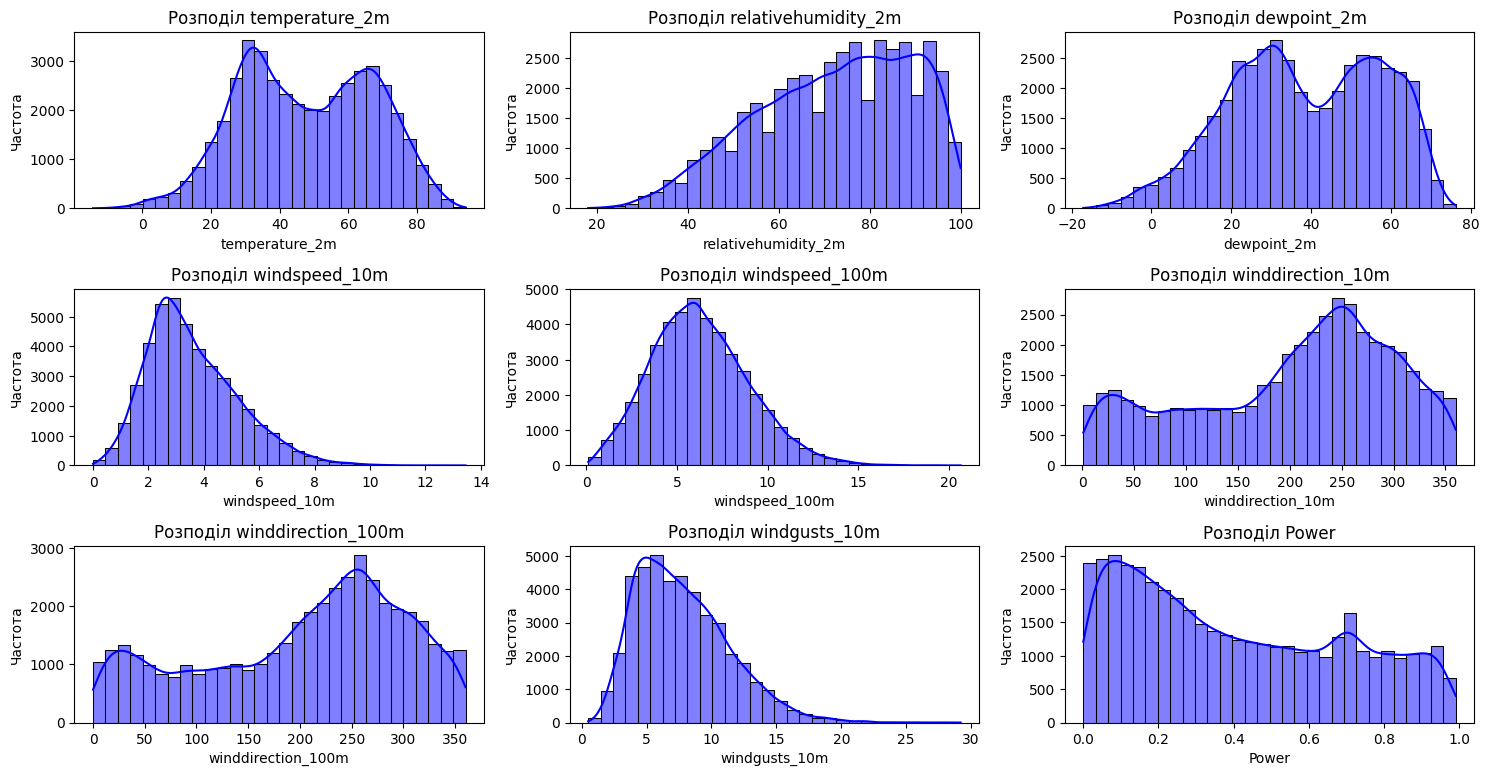

In [9]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.histplot(dataset_1[column], kde=True, bins=30, color='blue')
    plt.title(f'Розподіл {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

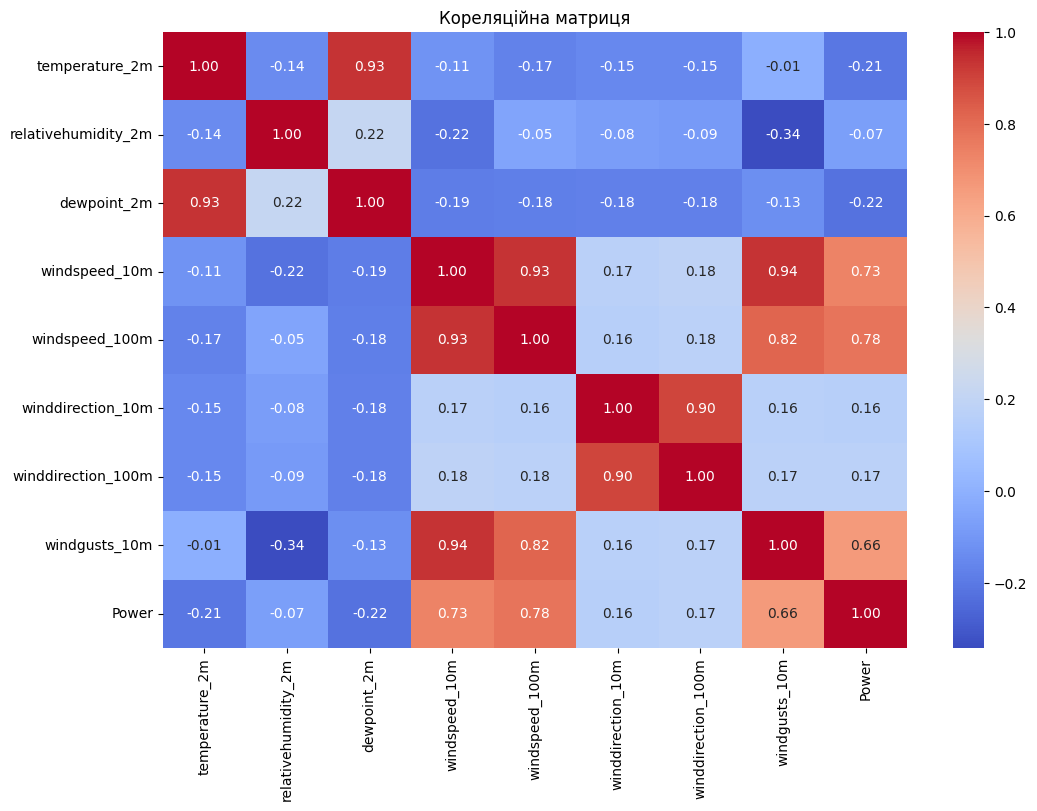

In [10]:
plt.figure(figsize=(12, 8))
corr_matrix = dataset_1[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Кореляційна матриця")
plt.show()

In [4]:
dtstmp = dataset_1

dtstmp['Time'] = pd.to_datetime(dtstmp['Time'])
df_time = dtstmp.copy()
df_time.set_index('Time', inplace=True)

In [12]:
df_time.head()

temperature_2m  relativehumidity_2m  dewpoint_2m  \
Time                                                                    
2017-01-02 00:00:00            28.5                   85         24.5   
2017-01-02 01:00:00            28.4                   86         24.7   
2017-01-02 02:00:00            26.8                   91         24.5   
2017-01-02 03:00:00            27.4                   88         24.3   
2017-01-02 04:00:00            27.3                   88         24.1   

                     windspeed_10m  windspeed_100m  winddirection_10m  \
Time                                                                    
2017-01-02 00:00:00           1.44            1.26                146   
2017-01-02 01:00:00           2.06            3.99                151   
2017-01-02 02:00:00           1.30            2.78                148   
2017-01-02 03:00:00           1.30            2.69                 58   
2017-01-02 04:00:00           2.47            4.43                 58   

                     winddirection_100m  windgusts_10m   Power  
Time                                                            
2017-01-02 00:00:00                 162            1.4  0.1635  
2017-01-02 01:00:00                 158            4.4  0.1424  
2017-01-02 02:00:00                 150            3.2  0.1214  
2017-01-02 03:00:00                 105            1.6  0.1003  
2017-01-02 04:00:00                  84            4.0  0.0793

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

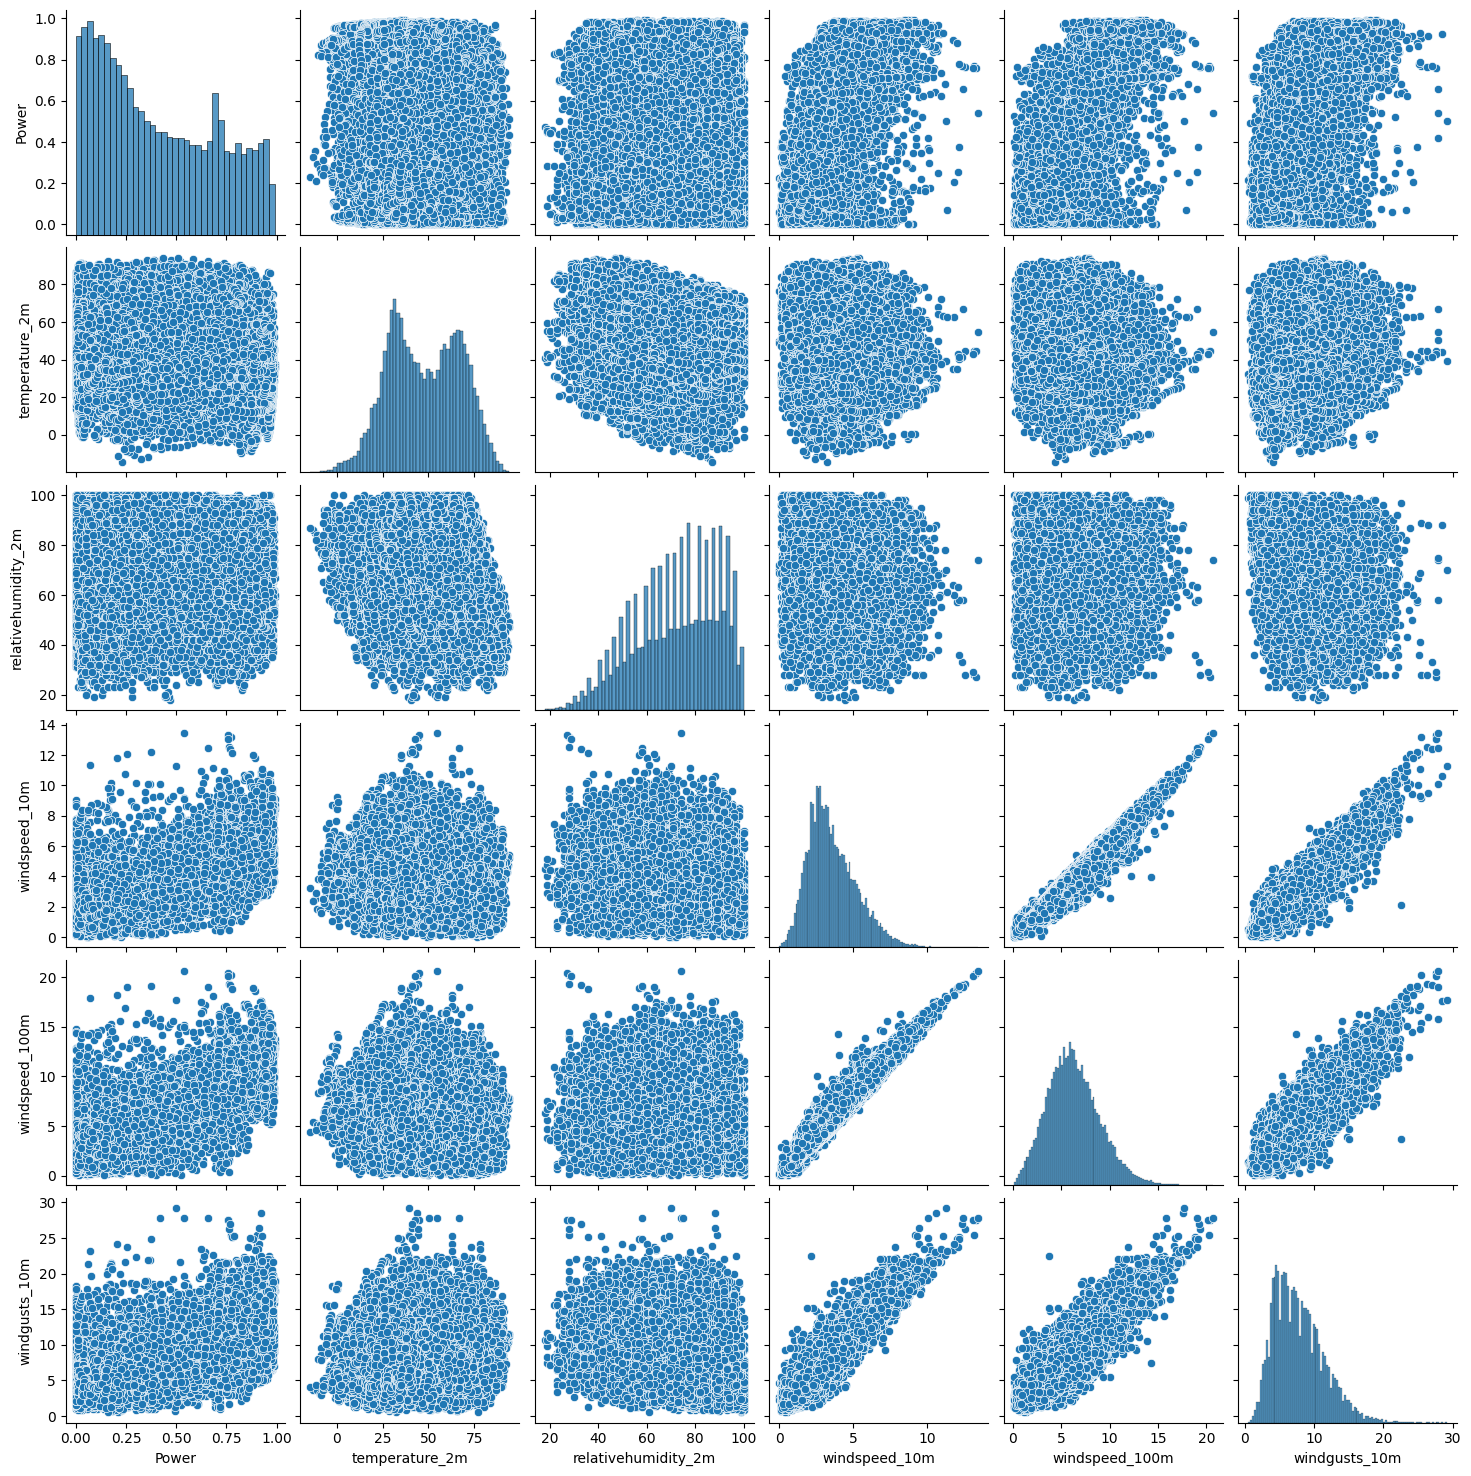

In [13]:
sns.pairplot(df_time[['Power', 'temperature_2m', 'relativehumidity_2m', 'windspeed_10m', 'windspeed_100m', 'windgusts_10m']])

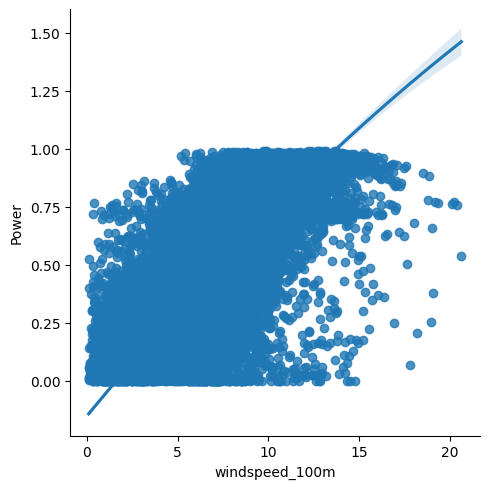

In [14]:
sns.lmplot(x='windspeed_100m', y='Power', data=df_time, order=2)

In [15]:
df_time.head()

temperature_2m  relativehumidity_2m  dewpoint_2m  \
Time                                                                    
2017-01-02 00:00:00            28.5                   85         24.5   
2017-01-02 01:00:00            28.4                   86         24.7   
2017-01-02 02:00:00            26.8                   91         24.5   
2017-01-02 03:00:00            27.4                   88         24.3   
2017-01-02 04:00:00            27.3                   88         24.1   

                     windspeed_10m  windspeed_100m  winddirection_10m  \
Time                                                                    
2017-01-02 00:00:00           1.44            1.26                146   
2017-01-02 01:00:00           2.06            3.99                151   
2017-01-02 02:00:00           1.30            2.78                148   
2017-01-02 03:00:00           1.30            2.69                 58   
2017-01-02 04:00:00           2.47            4.43                 58   

                     winddirection_100m  windgusts_10m   Power  
Time                                                            
2017-01-02 00:00:00                 162            1.4  0.1635  
2017-01-02 01:00:00                 158            4.4  0.1424  
2017-01-02 02:00:00                 150            3.2  0.1214  
2017-01-02 03:00:00                 105            1.6  0.1003  
2017-01-02 04:00:00                  84            4.0  0.0793

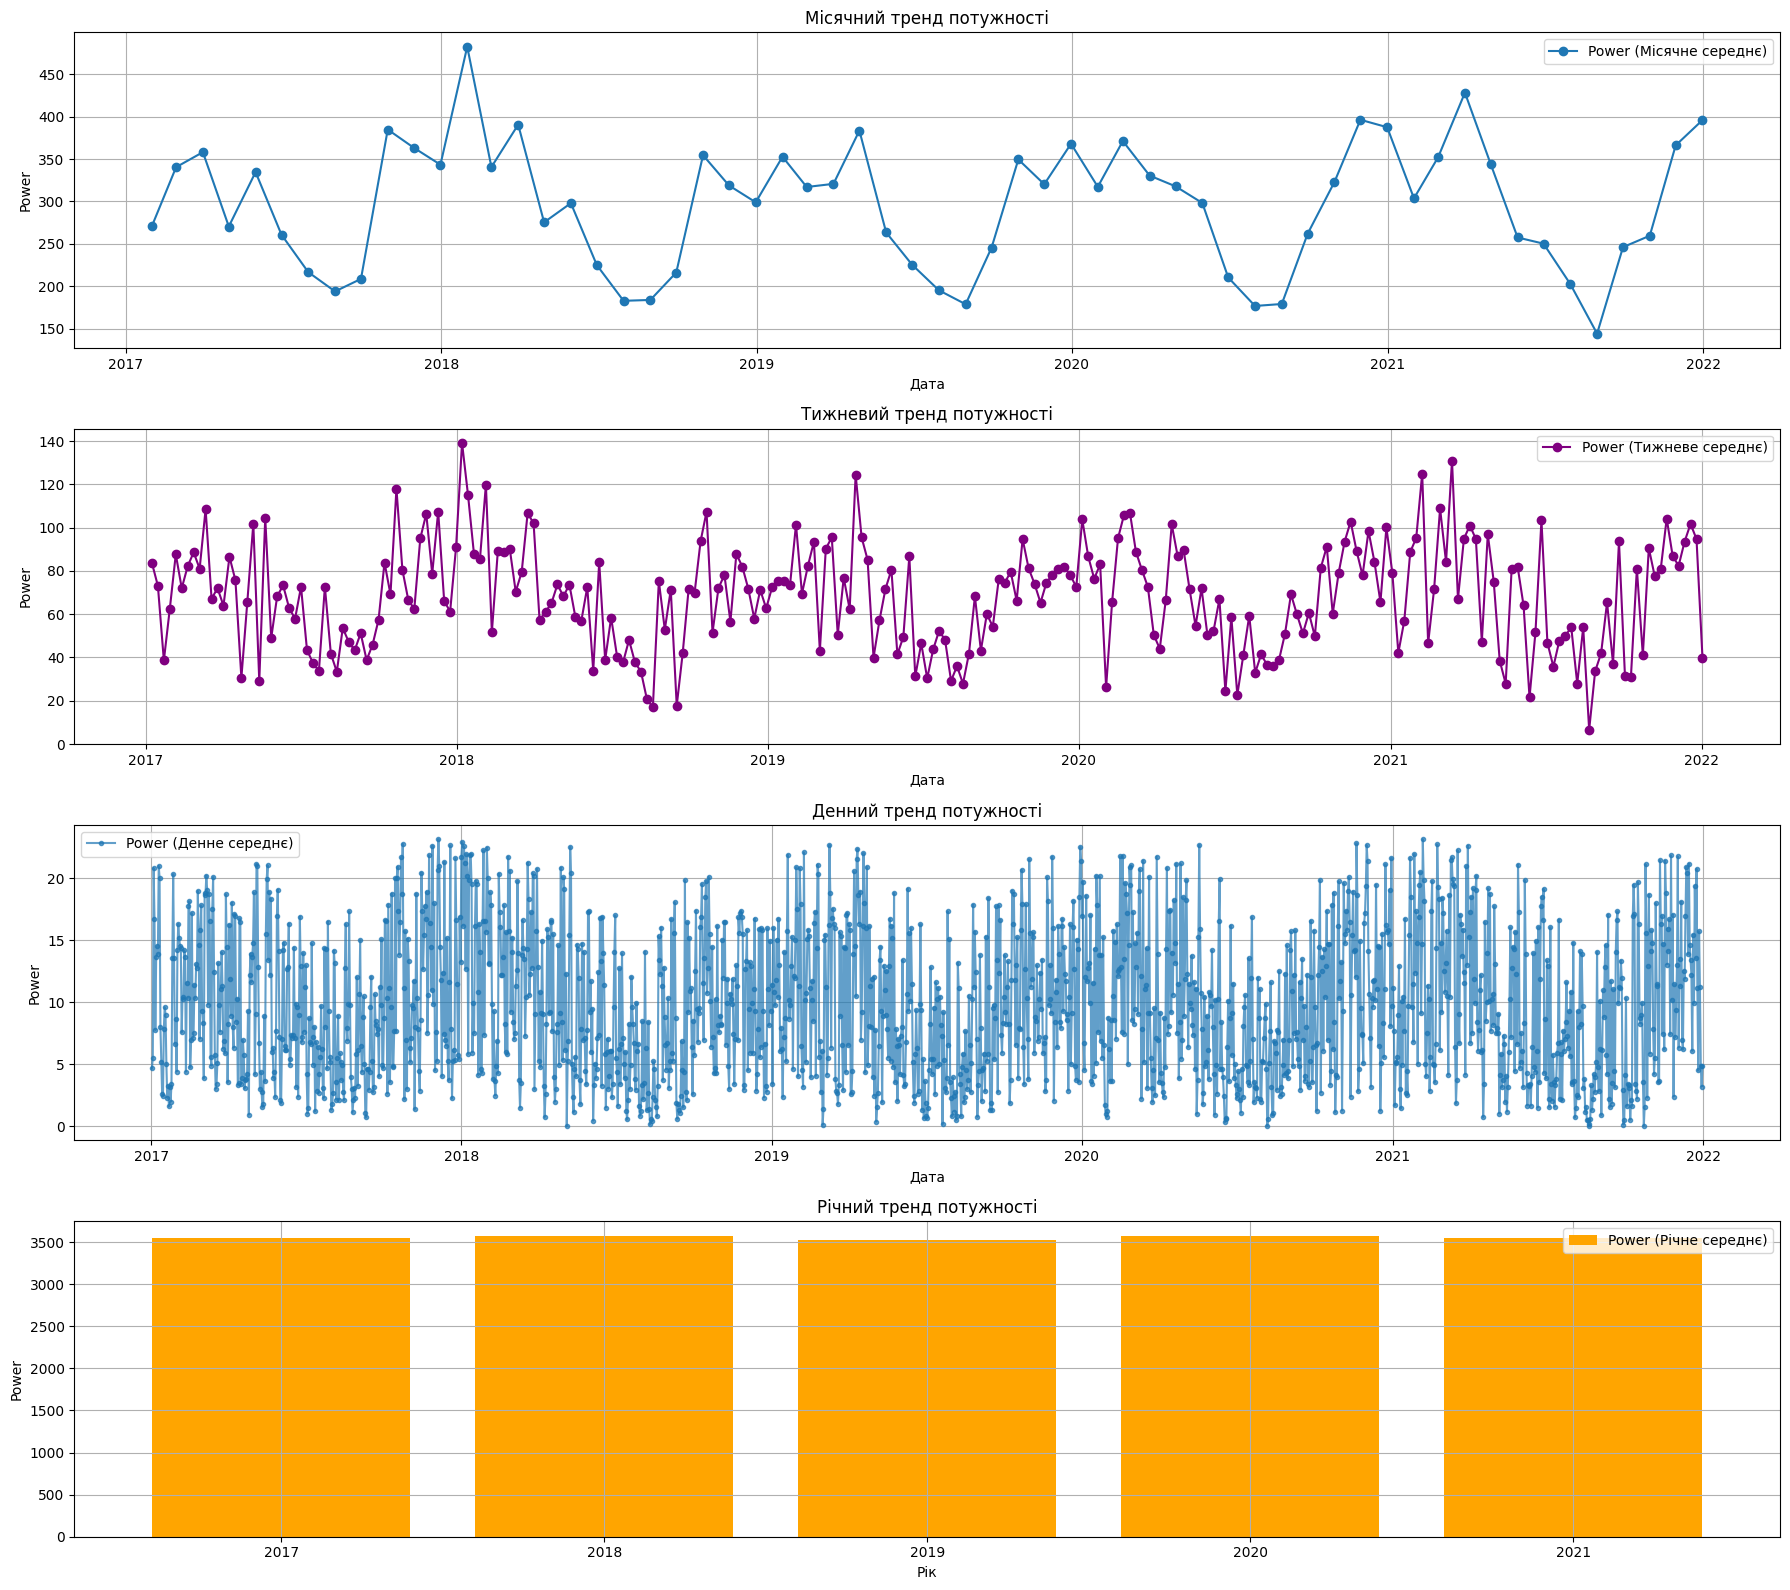

In [16]:
monthly_data = df_time.resample('M').sum()
weekly_data = df_time.resample('W').sum()
daily_data = df_time.resample('D').sum()
yearly_data = df_time.resample('Y').sum()

plt.figure(figsize=(18, 16))

column = 'Power'

plt.subplot(4, 1, 1)
plt.plot(monthly_data.index, monthly_data[column], marker='o', label=f'{column} (Місячне середнє)')
plt.title('Місячний тренд потужності')
plt.xlabel('Дата')
plt.ylabel(column)
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(weekly_data.index, weekly_data[column], marker='o', color='purple', label=f'{column} (Тижневе середнє)')
plt.title('Тижневий тренд потужності')
plt.xlabel('Дата')
plt.ylabel(column)
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(daily_data.index, daily_data[column], marker='.', label=f'{column} (Денне середнє)', alpha=0.7)
plt.title('Денний тренд потужності')
plt.xlabel('Дата')
plt.ylabel(column)
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.bar(yearly_data.index.year, yearly_data[column], color='orange', label=f'{column} (Річне середнє)')
plt.title('Річний тренд потужності')
plt.xlabel('Рік')
plt.ylabel(column)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

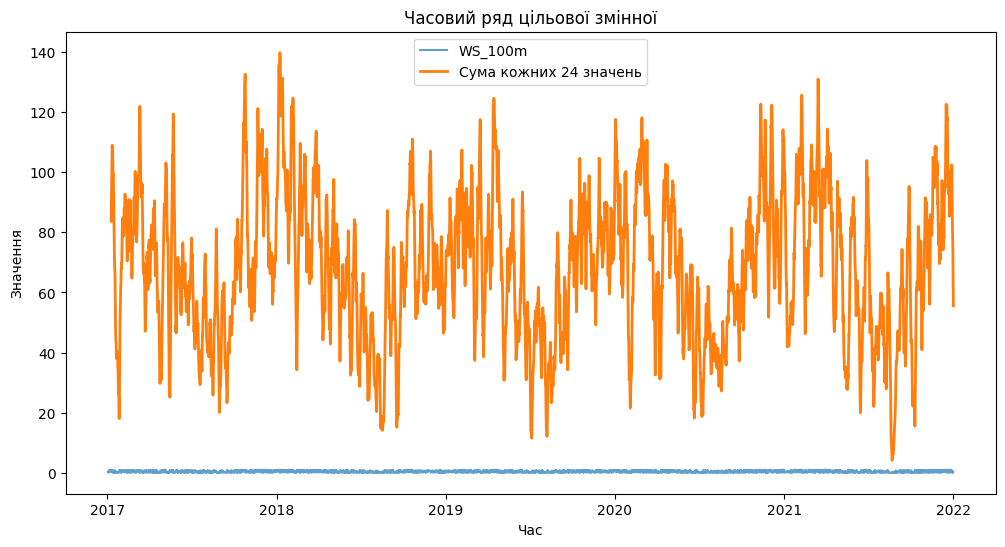

In [18]:
import matplotlib.pyplot as plt

rolling_sum = df_time['Power'].rolling(window=24*7).sum()

plt.figure(figsize=(12, 6))
plt.plot(df_time['Power'], label='WS_100m', alpha=0.7)
plt.plot(rolling_sum, label='Сума кожних 24 значень', linewidth=2)
plt.title('Часовий ряд цільової змінної')
plt.xlabel('Час')
plt.ylabel('Значення')
plt.legend()
plt.show()

1. monthly_data
2. weekly_data
3. daily_data
4. yearly_data


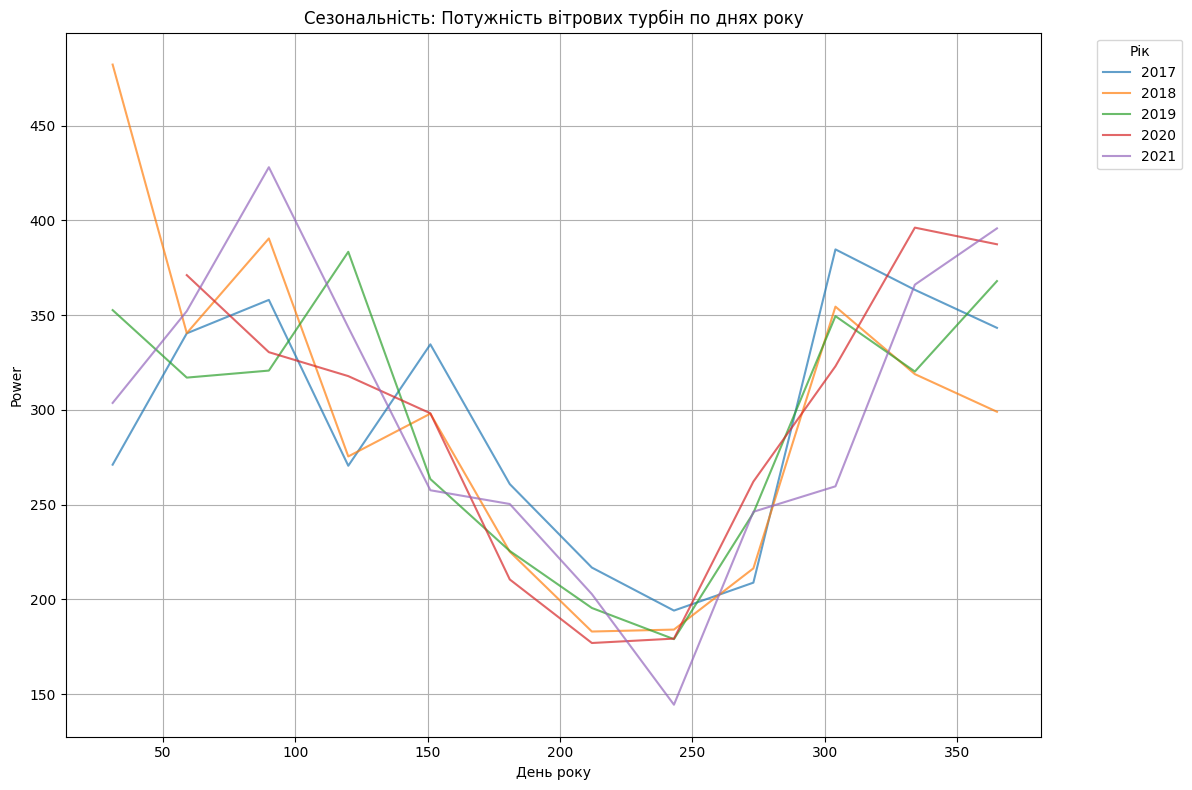

In [19]:
temp = monthly_data.copy()
temp['DayOfYear'] = temp.index.dayofyear
temp['Year'] = temp.index.year

temp.loc[temp.index.year == 2020, 'DayOfYear'] = temp.loc[temp.index.year == 2020, 'DayOfYear'] - 1

# Групування даних за днем року та роками
seasonal_data = temp.groupby(['DayOfYear', 'Year'])['Power'].mean().unstack()

# Побудова графіка
plt.figure(figsize=(12, 8))

# Додавання кожного року на графік
for year in seasonal_data.columns:
    plt.plot(seasonal_data.index, seasonal_data[year], label=str(year), alpha=0.7)

# Оформлення графіка
plt.title('Сезональність: Потужність вітрових турбін по днях року')
plt.xlabel('День року')
plt.ylabel('Power')
plt.legend(title='Рік', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
from scipy.stats import zscore

test_df = weekly_data

outliers = {}
for column in numerical_columns:
    z_scores = zscore(test_df[column])
    outliers[column] = test_df[column][abs(z_scores) > 3]

for column, outlier_values in outliers.items():
    print(f"Колонка: {column}")
    print(f"Аутлаєри:\n{outlier_values}")
    print("-" * 50)

Колонка: temperature_2m
Аутлаєри:
Series([], Freq: W-SUN, Name: temperature_2m, dtype: float64)
--------------------------------------------------
Колонка: relativehumidity_2m
Аутлаєри:
Time
2017-03-12    8593
Freq: W-SUN, Name: relativehumidity_2m, dtype: int64
--------------------------------------------------
Колонка: dewpoint_2m
Аутлаєри:
Series([], Freq: W-SUN, Name: dewpoint_2m, dtype: float64)
--------------------------------------------------
Колонка: windspeed_10m
Аутлаєри:
Series([], Freq: W-SUN, Name: windspeed_10m, dtype: float64)
--------------------------------------------------
Колонка: windspeed_100m
Аутлаєри:
Series([], Freq: W-SUN, Name: windspeed_100m, dtype: float64)
--------------------------------------------------
Колонка: winddirection_10m
Аутлаєри:
Series([], Freq: W-SUN, Name: winddirection_10m, dtype: int64)
--------------------------------------------------
Колонка: winddirection_100m
Аутлаєри:
Series([], Freq: W-SUN, Name: winddirection_100m, dtype: int64)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/usr/local/lib/pyth

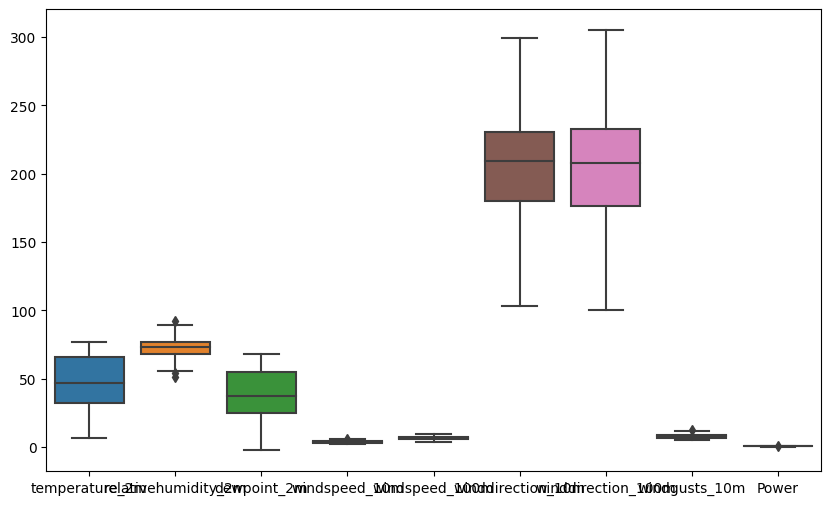

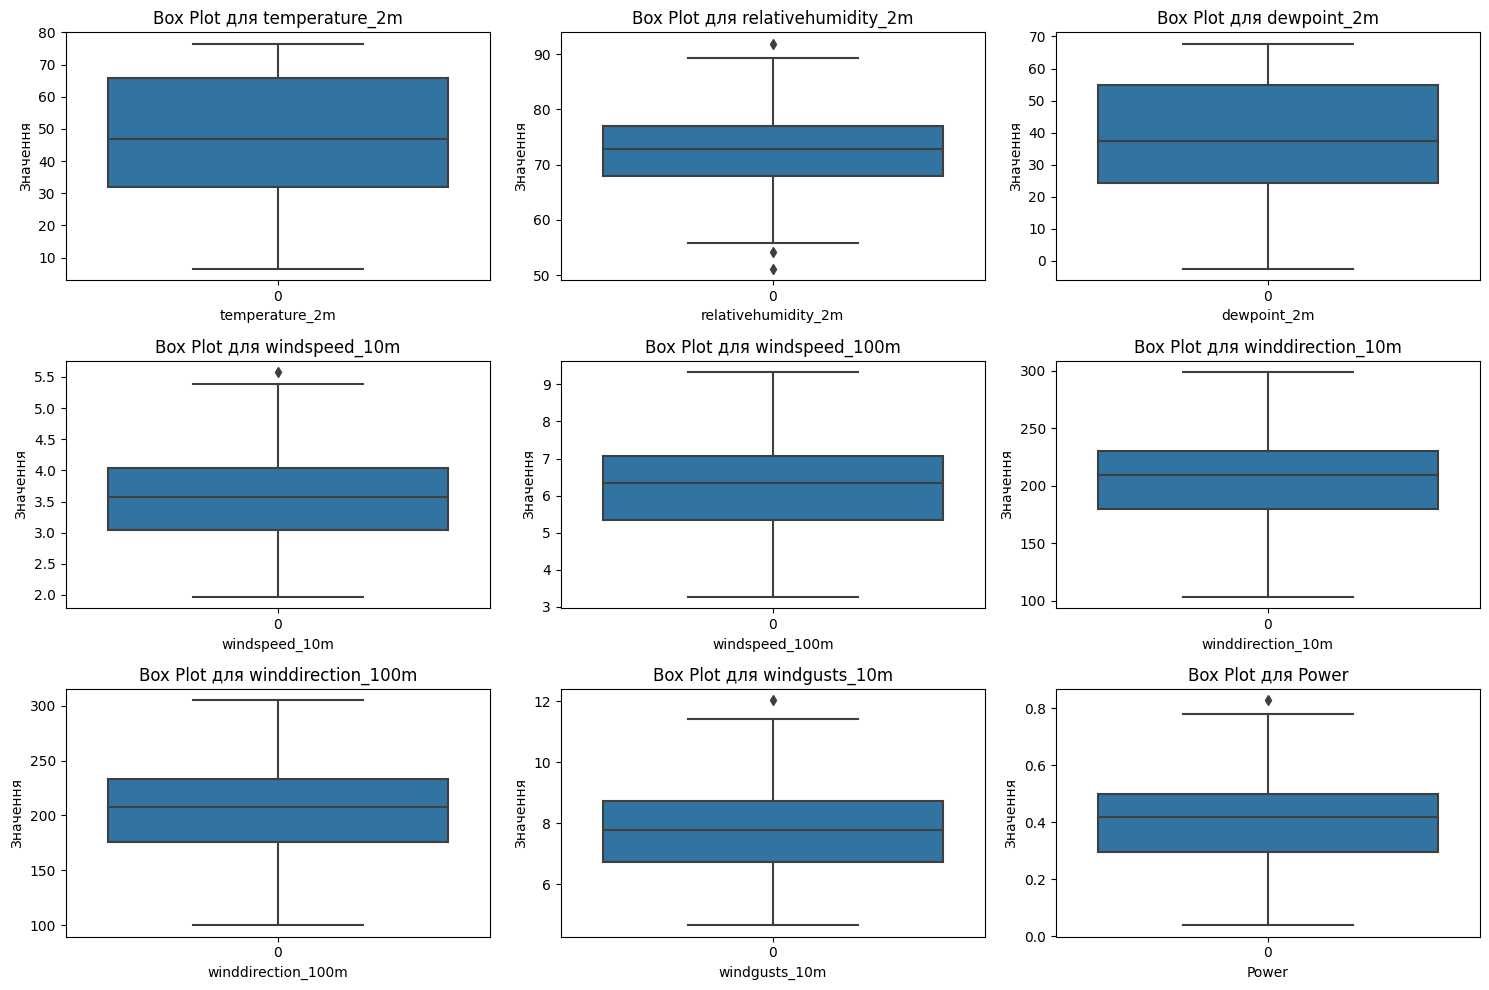

In [21]:
data = df_time.resample('W').mean()
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)

plt.figure(figsize=(15, 10))
for i, col in enumerate(df_time.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data[col])
    plt.title(f'Box Plot для {col}')
    plt.xlabel(col)
    plt.ylabel('Значення')

plt.tight_layout()
plt.show()

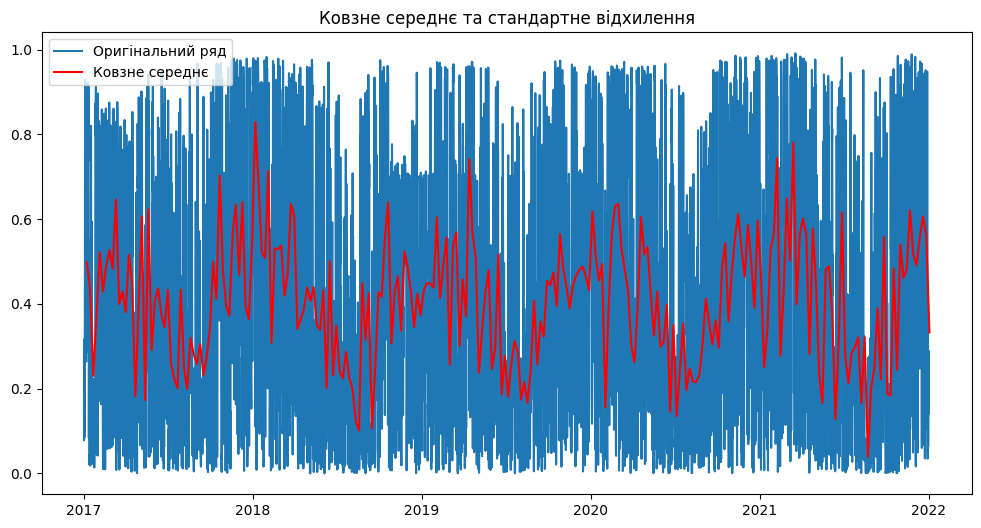

In [23]:
rolling_mean = data['Power'].rolling(window=1).mean()
rolling_std = data['Power'].rolling(window=1).std()

plt.figure(figsize=(12, 6))
plt.plot(df_time['Power'], label='Оригінальний ряд')
plt.plot(rolling_mean, label='Ковзне середнє', color='red')
#plt.plot(rolling_std, label='Ковзне стандартне відхилення', color='green')
plt.title('Ковзне середнє та стандартне відхилення')
plt.legend()
plt.show()

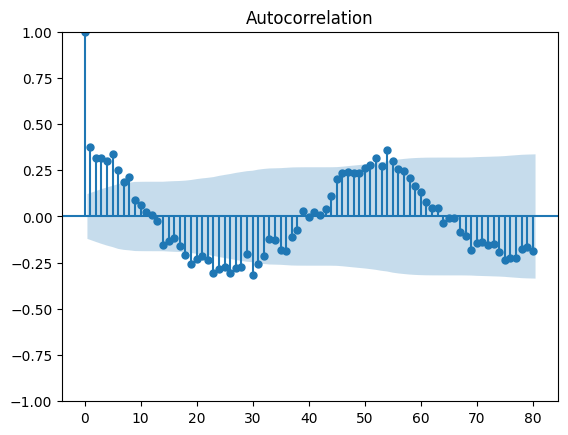

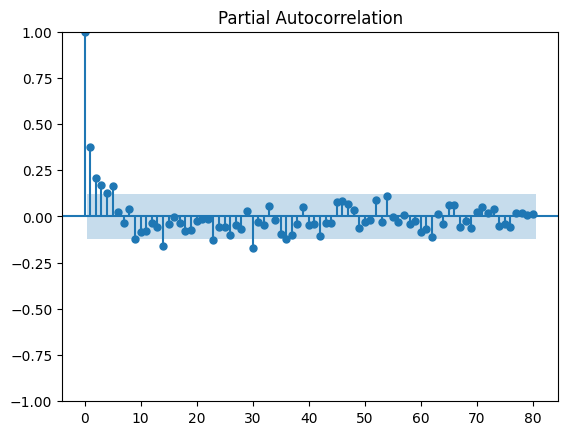

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_df_time = plot_acf(data['Power'], lags=80)
pacf_df_time = plot_pacf(data['Power'], lags=80)

In [29]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['Power'])
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print(f"Critical Values: {adf_test[4]}")

if adf_test[1] <= 0.05:
    print("The time series is stationary (p-value <= 0.05).")
else:
    print("The time series is not stationary (p-value > 0.05).")

Augmented Dickey-Fuller Test Results:
ADF Statistic: -4.764658064809365
p-value: 6.3515763060593e-05
Critical Values: {'1%': -3.457105309726321, '5%': -2.873313676101283, '10%': -2.5730443824681606}
The time series is stationary (p-value <= 0.05).


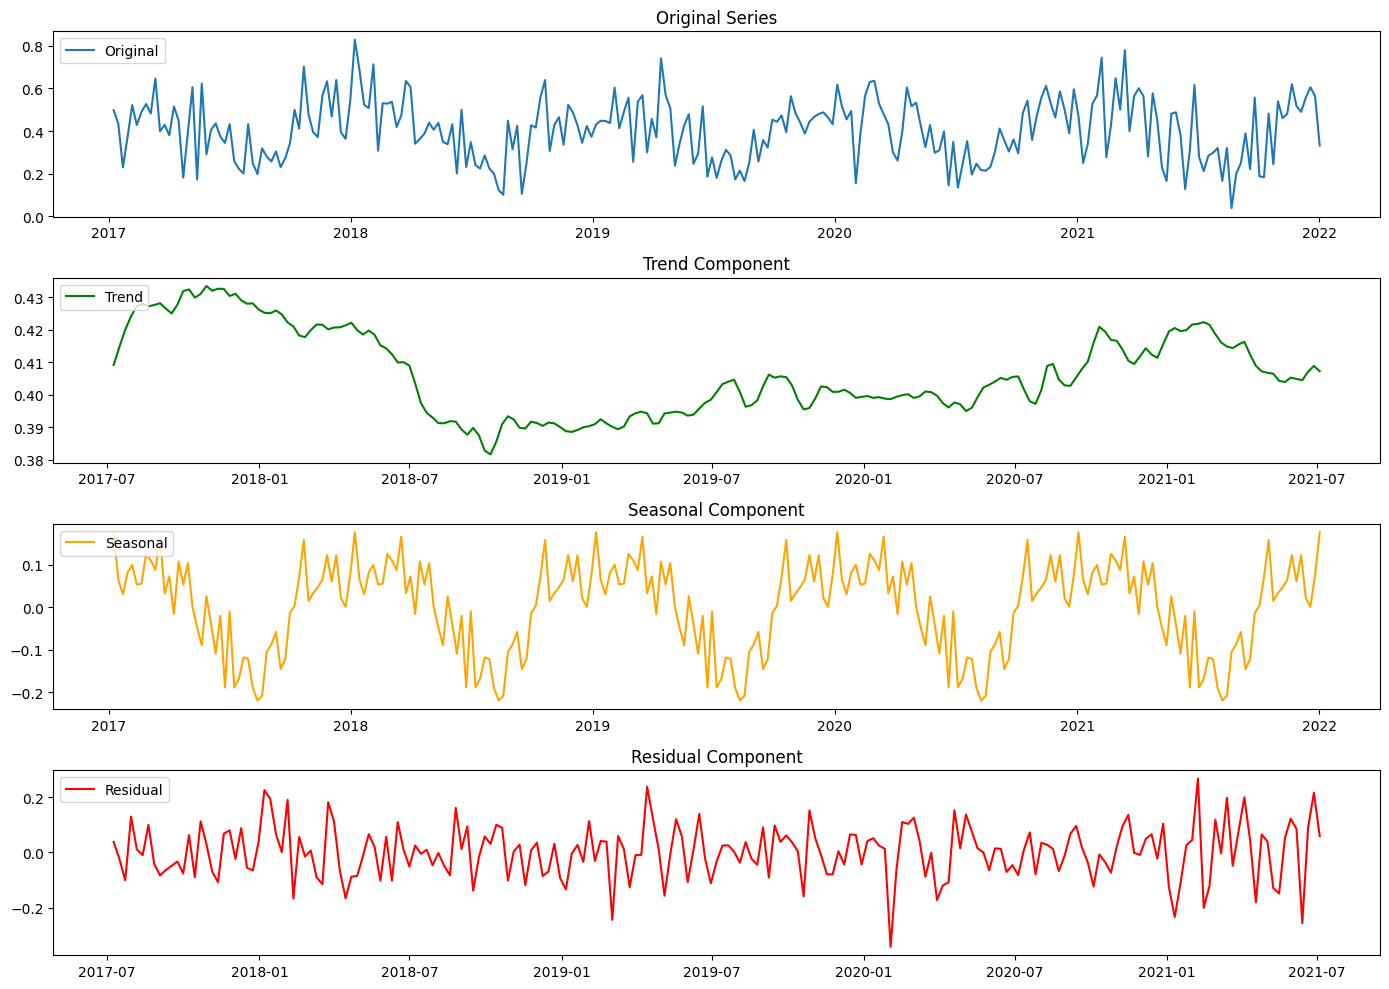

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

temp = data['Power']

decomposition = seasonal_decompose(temp, model='additive', period=52)  # тут 'period=24' - добова сезонність (24 години)

plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(temp, label='Original')
plt.title('Original Series')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='orange')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# **ExponentialSmoothing**

In [192]:
data = df_time.resample('M').sum()

In [207]:
data.head()

temperature_2m  relativehumidity_2m  dewpoint_2m  windspeed_10m  \
Time                                                                          
2017-01-31         19490.8                56021      14823.9        2603.89   
2017-02-28         21944.9                46624      15515.0        2822.36   
2017-03-31         23900.3                48366      15168.5        3163.18   
2017-04-30         35027.6                49942      27359.1        3021.25   
2017-05-31         40213.7                49922      31546.5        2873.84   

            windspeed_100m  winddirection_10m  winddirection_100m  \
Time                                                                
2017-01-31         4669.72             155564              158463   
2017-02-28         4936.22             151367              154158   
2017-03-31         5332.64             153785              151264   
2017-04-30         5212.12             128782              130304   
2017-05-31         4883.24             134791              135049   

            windgusts_10m     Power  
Time                                 
2017-01-31         5469.8  271.0822  
2017-02-28         5966.6  340.4206  
2017-03-31         6844.9  358.0661  
2017-04-30         6688.3  270.5149  
2017-05-31         6382.4  334.6152

In [209]:
target = data['Power']
target.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 60 entries, 2017-01-31 to 2021-12-31
Freq: M
Series name: Power
Non-Null Count  Dtype  
--------------  -----  
60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


In [210]:
size = int(len(target) * 0.8)
train, test = target[0:size], target[size:len(target)]

#exog = df[['Is Daylight', 'Sky Cover', 'Distance to Solar Noon', 'Visibility' , 'Relative Humidity']]
#train_exog, test_exog = exog[0:size], exog[size:len(time_series)]

In [211]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


model = ExponentialSmoothing(train, 
                             trend='add', 
                             seasonal='add', 
                             seasonal_periods=12)
model_fitted = model.fit()

In [212]:
forecast = model_fitted.forecast(steps=len(test))

In [213]:
forecast, test

(2021-01-31    355.633244
 2021-02-28    342.737915
 2021-03-31    350.482732
 2021-04-30    311.911186
 2021-05-31    299.295643
 2021-06-30    231.164851
 2021-07-31    193.323045
 2021-08-31    184.473575
 2021-09-30    233.870626
 2021-10-31    353.091115
 2021-11-30    350.457631
 2021-12-31    349.784580
 Freq: M, dtype: float64,
 Time
 2021-01-31    303.6805
 2021-02-28    352.1427
 2021-03-31    428.1180
 2021-04-30    343.5892
 2021-05-31    257.5817
 2021-06-30    250.3215
 2021-07-31    202.7594
 2021-08-31    144.3655
 2021-09-30    246.2132
 2021-10-31    259.6591
 2021-11-30    366.1193
 2021-12-31    395.8314
 Freq: M, Name: Power, dtype: float64)

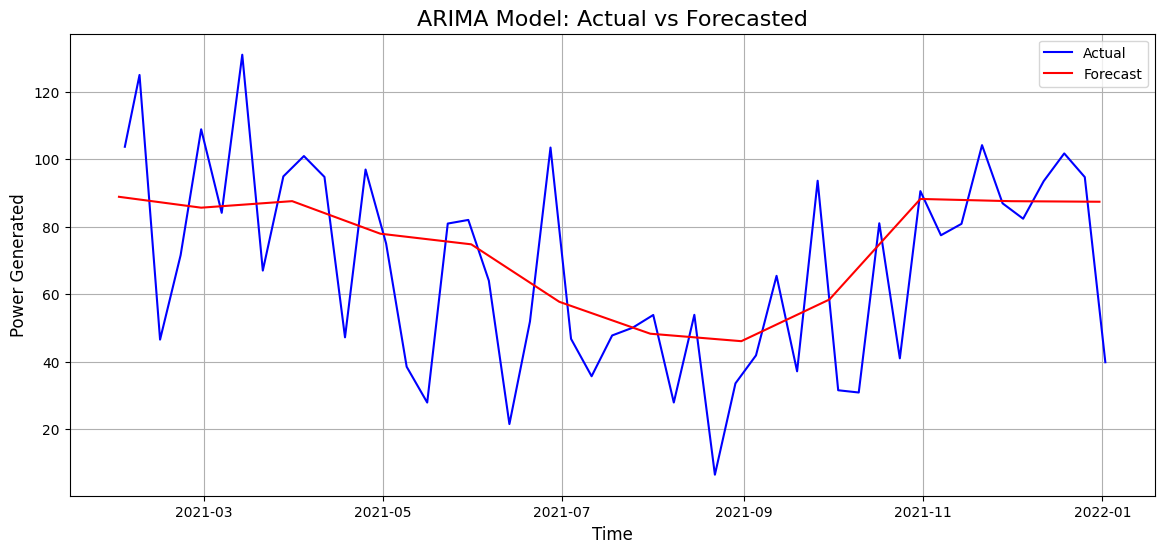

In [214]:
clip = len(test)

predictions = forecast.resample('D').interpolate(method='linear')
test_resample = df_time['Power'].resample('W').sum()

test_resample = test_resample.resample('D').interpolate(method='linear')

size = len(test_resample) - len(predictions)

test_plt = test_resample[size:]
forecast_plt = predictions

plt.figure(figsize=(14, 6))
plt.plot(test_plt.index, test_plt, label='Actual', color='blue')
plt.plot(forecast_plt.index, forecast_plt, label='Forecast', color='red')
plt.title('ARIMA Model: Actual vs Forecasted', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Power Generated', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [215]:
test_plt.shape, forecast_plt.shape

((335,), (335,))

In [216]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

test = test_plt
forecast = forecast_plt

mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
r2 = r2_score(test, forecast)
mape = (mae / sum(test) * 100)

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')
print(f"MAPE: {mape:.2f}%")
print("R^2:", r2)

mae - manual: 14.599059840480212
mape - manual: 0.06404937242765878
rmse - manual: 18.86802070548548
MAPE: 0.06%
R^2: 0.45413298593559903


# **Arima**

In [35]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.0 MB/s eta 0:00:0000:010:01


In [75]:
data = df_time.resample('M').sum()

In [76]:
target = data['Power']
target.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 60 entries, 2017-01-31 to 2021-12-31
Freq: M
Series name: Power
Non-Null Count  Dtype  
--------------  -----  
60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


In [77]:
size = int(len(target) * 0.8)
train, test = target[0:size], target[size:len(target)]

In [221]:
import pmdarima as pm

auto_arima = pm.auto_arima(train,
                           #exog=exog,
                           information_criterion = 'bic',
                           start_p = 7, start_q = 3,
                           max_p=7, max_q=15,
                           m=12,
                           start_P=1,
                           trace=True,
                           error_action='ignore',
                           supperess_warning=True,
                           stepwise=False, 
                           seasonal=True)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=555.036, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : BIC=542.024, Time=0.20 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : BIC=541.918, Time=0.37 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : BIC=533.470, Time=0.22 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : BIC=538.912, Time=0.36 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : BIC=542.051, Time=0.76 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : BIC=536.931, Time=0.66 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : BIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : BIC=inf, Time=0.85 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : BIC=545.658, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=538.520, Time=0.20 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : BIC=541.303, Time=0.41 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : BIC=535.116, Time=0.31 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : BIC=538.552, Time=0.44 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : BIC=545.131, Time=0.41 sec
 ARIMA(0,0,1)(2,0,

In [222]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   48
Model:             SARIMAX(1, 0, 0, 12)   Log Likelihood                -260.928
Date:                  Thu, 02 Jan 2025   AIC                            527.856
Time:                          17:42:36   BIC                            533.470
Sample:                      01-31-2017   HQIC                           529.978
                           - 12-31-2020                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     90.4268     37.393      2.418      0.016      17.137     163.716
ar.S.L12       0.6948      0.126      5.528      0.000       0.448       0.941
sigma2      2615.7480    370.029      7.069      0.000    1890.504    3340.992
===================================================================================
Ljung-Box (L1) (Q):                   2.63   Jarque-Bera (JB):                37.96
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             1.43
Prob(H) (two-sided):                  0.05   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
import statsmodels.api as sm

p, d, q = 4, 0, 1
P, D, Q, m = 2, 0, 2, 12

model = sm.tsa.SARIMAX(train,
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, m))

model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [79]:
forecast = model_fit.forecast(len(test))
forecast = np.clip(forecast, a_min=0, a_max=None)

forecast, test

(2021-01-31    410.139345
 2021-02-28    388.950569
 2021-03-31    379.882473
 2021-04-30    330.818470
 2021-05-31    321.733215
 2021-06-30    253.146276
 2021-07-31    208.386108
 2021-08-31    209.596205
 2021-09-30    249.428096
 2021-10-31    348.353413
 2021-11-30    350.218288
 2021-12-31    352.250457
 Freq: M, Name: predicted_mean, dtype: float64,
 Time
 2021-01-31    303.6805
 2021-02-28    352.1427
 2021-03-31    428.1180
 2021-04-30    343.5892
 2021-05-31    257.5817
 2021-06-30    250.3215
 2021-07-31    202.7594
 2021-08-31    144.3655
 2021-09-30    246.2132
 2021-10-31    259.6591
 2021-11-30    366.1193
 2021-12-31    395.8314
 Freq: M, Name: Power, dtype: float64)

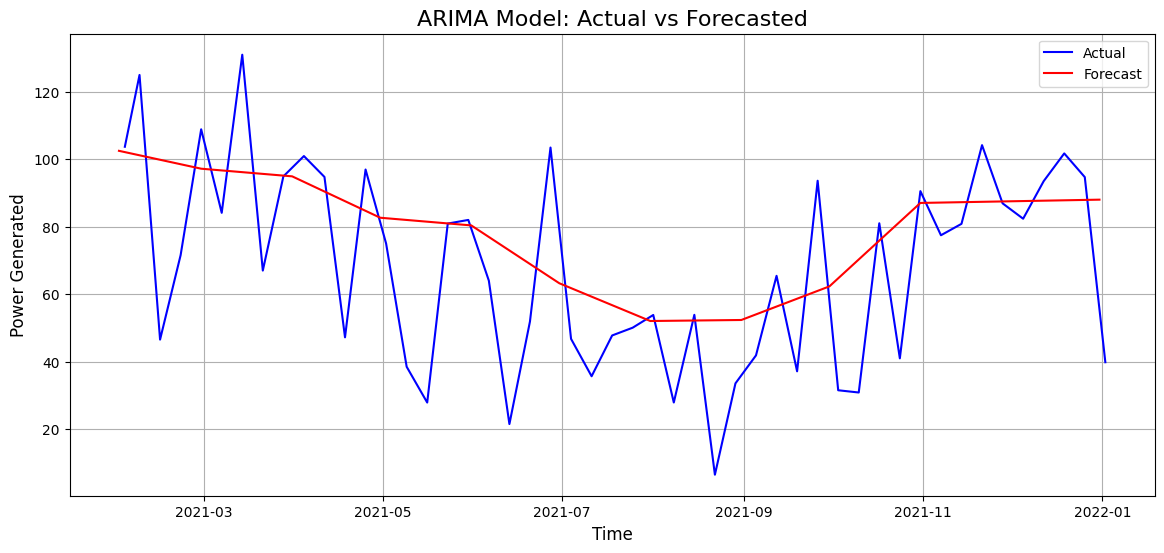

In [80]:
clip = len(test)

predictions_2 = forecast.resample('D').interpolate(method='linear').copy()
test_resample_2 = df_time['Power'].resample('W').sum()

test_resample_2 = test_resample_2.resample('D').interpolate(method='linear')

size = len(test_resample_2) - len(predictions_2)

test_plt = test_resample_2[size:]
forecast_plt = predictions_2

plt.figure(figsize=(14, 6))
plt.plot(test_plt.index, test_plt, label='Actual', color='blue')
plt.plot(forecast_plt.index, forecast_plt, label='Forecast', color='red')
plt.title('ARIMA Model: Actual vs Forecasted', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Power Generated', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [81]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

test = test_plt
forecast = forecast_plt

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
r2 = r2_score(test, forecast)
mape = (mae / sum(test) * 100)

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')
print(f"MAPE: {mape:.2f}%")
print("R^2:", r2)

mae - manual: 15.508259773145385
mape - manual: 0.06803823785699305
rmse - manual: 20.539482635534732
MAPE: 0.07%
R^2: 0.3531357302061563


# **Lstm**

## Data preparation

In [5]:
df_time.head()

temperature_2m  relativehumidity_2m  dewpoint_2m  \
Time                                                                    
2017-01-02 00:00:00            28.5                   85         24.5   
2017-01-02 01:00:00            28.4                   86         24.7   
2017-01-02 02:00:00            26.8                   91         24.5   
2017-01-02 03:00:00            27.4                   88         24.3   
2017-01-02 04:00:00            27.3                   88         24.1   

                     windspeed_10m  windspeed_100m  winddirection_10m  \
Time                                                                    
2017-01-02 00:00:00           1.44            1.26                146   
2017-01-02 01:00:00           2.06            3.99                151   
2017-01-02 02:00:00           1.30            2.78                148   
2017-01-02 03:00:00           1.30            2.69                 58   
2017-01-02 04:00:00           2.47            4.43                 58   

                     winddirection_100m  windgusts_10m   Power  
Time                                                            
2017-01-02 00:00:00                 162            1.4  0.1635  
2017-01-02 01:00:00                 158            4.4  0.1424  
2017-01-02 02:00:00                 150            3.2  0.1214  
2017-01-02 03:00:00                 105            1.6  0.1003  
2017-01-02 04:00:00                  84            4.0  0.0793

In [7]:
data = df_time.copy()

In [8]:
target = data['Power']

target.head()

Time
2017-01-02 00:00:00    0.1635
2017-01-02 01:00:00    0.1424
2017-01-02 02:00:00    0.1214
2017-01-02 03:00:00    0.1003
2017-01-02 04:00:00    0.0793
Name: Power, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(pd.DataFrame(target))

In [10]:
index = np.arange(0, len(scaler_data), 1)
scaler_df = pd.DataFrame(scaler_data, index=index, columns=['Power'])

In [12]:
data = data.drop('Power',axis=1)

In [13]:
train_size = int(len(scaler_df) * 0.8)
train, test = scaler_df.iloc[0:train_size], scaler_df.iloc[train_size:len(scaler_df)]
train_input, test_input = data.iloc[0:train_size], data.iloc[train_size:len(scaler_df)]

train.head()

Power
0  0.164935
1  0.143650
2  0.122465
3  0.101180
4  0.079996

In [14]:
def create_lag(X, y, time_steps=24):
    X_lag, y_lag = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        X_lag.append(v)        
        y_lag.append(y.iloc[i + time_steps])
    return np.array(X_lag), np.array(y_lag)

In [15]:
X_train, y_train = create_lag(train_input, train)
X_test, y_test = create_lag(test_input, test)

In [16]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (35016, 24, 8) (35016, 1)
Test data shape: (8736, 24, 8) (8736, 1)


## LSTM model 

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.models import Sequential

lstm_model = keras.Sequential([
    LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(units=64),
    Dropout(0.2),
    Dense(units=1)
])

lstm_model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(0.0001)
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', monitor='val_loss', save_best_only=True)

In [19]:
history = lstm_model.fit(
    X_train, y_train,
    epochs=250,
    batch_size=24,
    validation_split=0.2,
    verbose=1,
    shuffle=False,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/250
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - loss: 0.1190 - val_loss: 0.0671
Epoch 2/250
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - loss: 0.0662 - val_loss: 0.0432
Epoch 3/250
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - loss: 0.0516 - val_loss: 0.0383
Epoch 4/250
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - loss: 0.0456 - val_loss: 0.0353
Epoch 5/250
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - loss: 0.0418 - val_loss: 0.0342
Epoch 6/250
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - loss: 0.0401 - val_loss: 0.0334
Epoch 7/250
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - loss: 0.0379 - val_loss: 0.0323
Epoch 8/250
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - loss: 0.0376 - val_loss: 0.0316
Epoch 9/250
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - loss: 0.0363 - val_loss: 0.0311
Epoch 10/250
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - loss: 0.0354 - val_loss: 0.0305
Epoch 11/250
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - loss: 0.0346 - val_loss: 0.03

In [20]:
lstm_pred = lstm_model.predict(X_test)
df_lstm_final = test[lstm_pred.shape[0]*-1:].copy()
df_lstm_final['Prediction'] = lstm_pred[:,0]
df_reset_index = data.reset_index()

273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [21]:
df_lstm_final.head()

Power  Prediction
35064  0.551599    0.567334
35065  0.529608    0.540350
35066  0.507616    0.437567
35067  0.485625    0.472300
35068  0.463634    0.449647

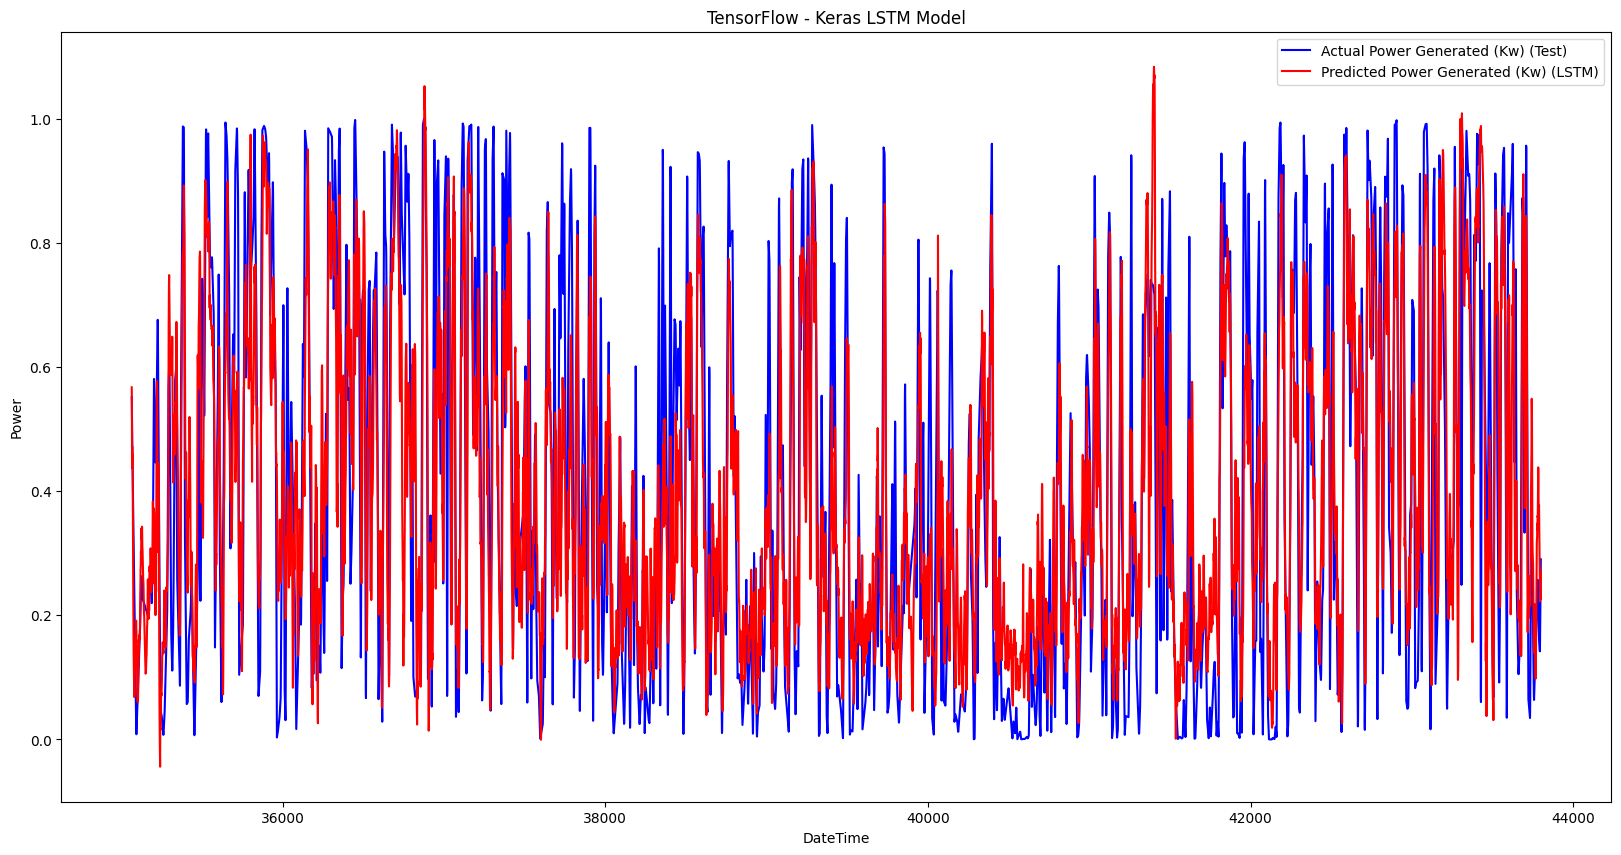

In [33]:
plt.figure(figsize=(20,10))
plt.title('TensorFlow - Keras LSTM Model')
plt.xlabel('DateTime')
plt.ylabel('Power')
plt.plot(df_lstm_final['Power'], color='Blue', label='Actual Power Generated (Kw) (Test)')
plt.plot(df_lstm_final['Prediction'], color='Red', label='Predicted Power Generated (Kw) (LSTM)')
plt.legend()

plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

test = df_lstm_final['Power']
forecast = df_lstm_final['Prediction']

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
r2 = r2_score(test, forecast)
mape = (mae / sum(test) * 100)

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')
print("R^2:", r2)

mae - manual: 0.13317897272156784
mape - manual: 0.0037301786884367553
rmse - manual: 0.16949673172774543
R^2: 0.6845227183893383


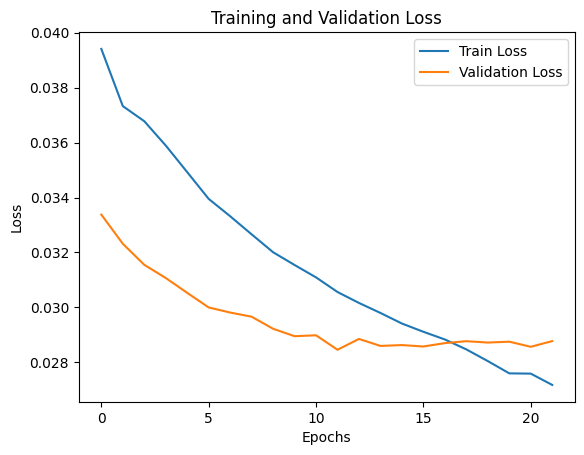

In [34]:
plt.plot(history.history['loss'][5:], label='Train Loss')
plt.plot(history.history['val_loss'][5:], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## LSTM model with Attention  mechanism

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dot, Activation, Concatenate, Flatten, Dropout
import tensorflow as tf

In [57]:
# Побудова моделі
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# LSTM-шар
lstm_out, state_h, state_c = LSTM(128, return_sequences=True, return_state=True)(input_layer)

lstm_out = Dropout(0.2)(lstm_out)

In [58]:
attention = Dense(1, activation='tanh')(lstm_out)
attention = Activation('softmax', name='attention_weights')(attention)
context_vector = Dot(axes=1)([attention, lstm_out])

In [59]:
from tensorflow.keras.layers import Lambda

state_h_expanded = Lambda(lambda x: tf.expand_dims(x, axis=1))(state_h)

context_and_hidden = Concatenate()([context_vector, state_h_expanded])

In [60]:
from tensorflow import keras

context_and_hidden_flat = Flatten()(context_and_hidden)

# Вихідний шар
output = Dense(1)(context_and_hidden)

# Модель
model = Model(inputs=input_layer, outputs=output)
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(0.001)
)

In [61]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [62]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', monitor='val_loss', save_best_only=True)

In [63]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=24, 
    validation_split=0.2,
    shuffle=False,
    callbacks=[model_checkpoint, early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 24, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1168/1168 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - loss: 5.6080 - val_loss: 0.6666
Epoch 2/50
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - loss: 1.0284 - val_loss: 0.1512
Epoch 3/50
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - loss: 0.5401 - val_loss: 0.1306
Epoch 4/50
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step - loss: 0.2821 - val_loss: 0.0896
Epoch 5/50
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step - loss: 0.1701 - val_loss: 0.0883
Epoch 6/50
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - loss: 0.1052 - val_loss: 0.0613
Epoch 7/50
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - loss: 0.0774 - val_loss: 0.0837
Epoch 8/50
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - loss: 0.0665 - val_loss: 0.0833
Epoch 9/50
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step - loss: 0.0604 - val_loss: 0.0534
Epoch 10/50
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - loss: 0.0565 - val_loss: 0.0508
Epoch 11/50
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step - loss: 0.0514 - val_loss: 0.0388
Epoch 12/50
1168/11

In [69]:
lstm_pred = model.predict(X_test)
df_lstm_final = test[lstm_pred.shape[0]*-1:].copy()
df_lstm_final['Prediction'] = lstm_pred[:,0]
df_reset_index = data.reset_index()

273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [67]:
train_size = int(len(scaler_df) * 0.8)
train, test = scaler_df.iloc[0:train_size], scaler_df.iloc[train_size:len(scaler_df)]
train_input, test_input = data.iloc[0:train_size], data.iloc[train_size:len(scaler_df)]

train.head()

Power
0  0.164935
1  0.143650
2  0.122465
3  0.101180
4  0.079996

In [70]:
df_lstm_final.head()

Power  Prediction
35064  0.551599    0.651678
35065  0.529608    0.306238
35066  0.507616    0.291605
35067  0.485625    0.346694
35068  0.463634    0.400852

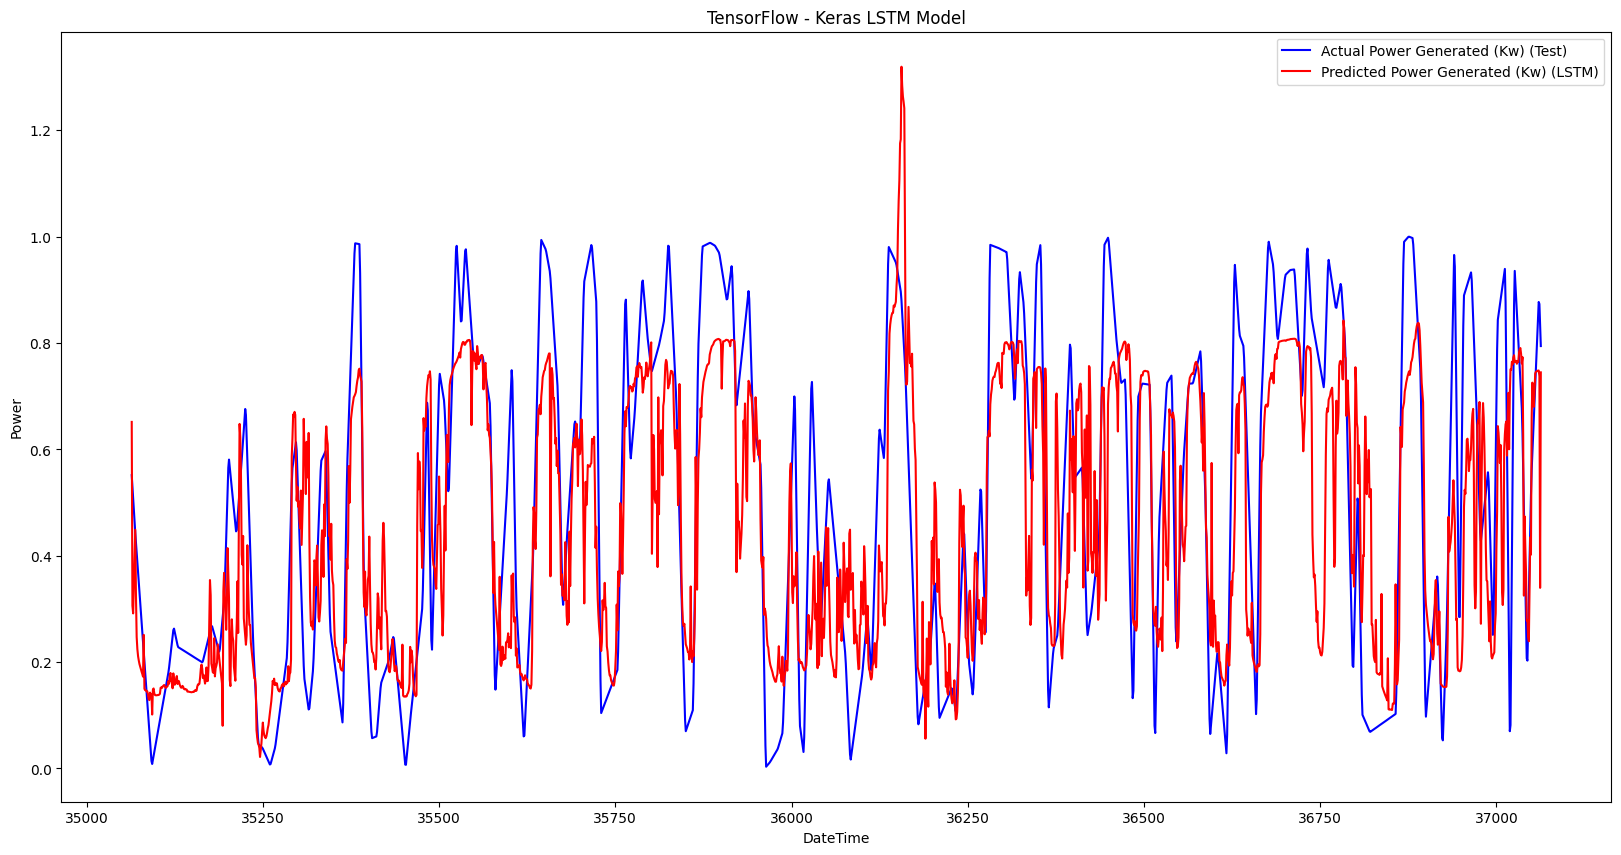

In [71]:
plt.figure(figsize=(20,10))
plt.title('TensorFlow - Keras LSTM Model')
plt.xlabel('DateTime')
plt.ylabel('Power')
plt.plot(df_lstm_final['Power'][:2000], color='Blue', label='Actual Power Generated (Kw) (Test)')
plt.plot(df_lstm_final['Prediction'][:2000], color='Red', label='Predicted Power Generated (Kw) (LSTM)')
plt.legend()

plt.show()

In [73]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

test = df_lstm_final['Power']
forecast = df_lstm_final['Prediction']

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
r2 = r2_score(test, forecast)
mape = (mae / sum(test) * 100)

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')
print("R^2:", r2)

mae - manual: 0.1371770262295867
mape - manual: 0.003842159233759182
rmse - manual: 0.176470896093851
R^2: 0.658027160076974


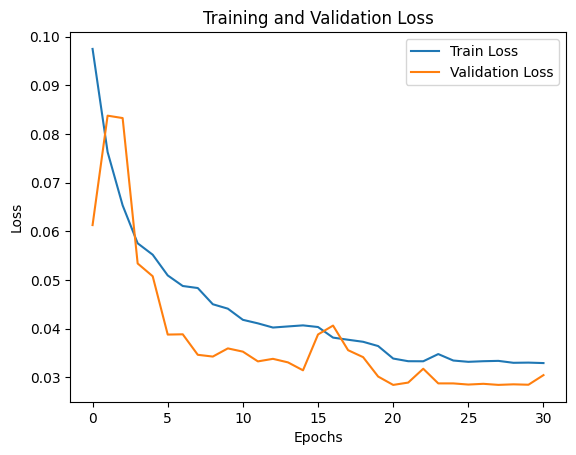

In [74]:
plt.plot(history.history['loss'][5:], label='Train Loss')
plt.plot(history.history['val_loss'][5:], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()